In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv("Customer Churn.csv")


In [2]:
# replacing the blanks with 0 as tenure is 0 and updating data type to float

df['TotalCharges'] = df['TotalCharges'].replace(" ", "0")
df['TotalCharges'] = df['TotalCharges'].astype(float)


In [49]:
# function for Senior Citizen Column to display yes/no (Easy to read/understand)

def conversion(value):
    if value ==0:
        return 'No'
    else:
        return 'Yes'

df['SeniorCitizen']=df['SeniorCitizen'].apply(conversion)

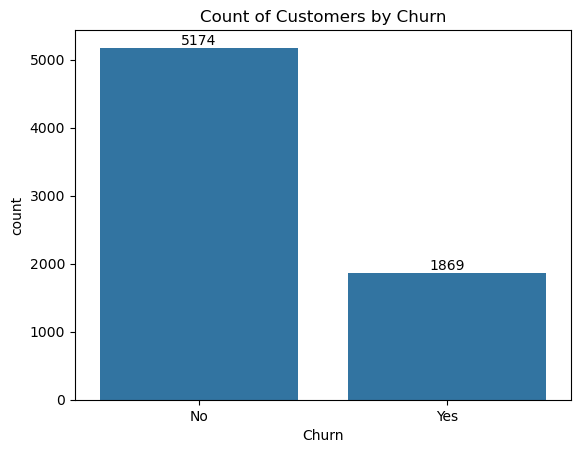

In [87]:
ax=sns.countplot(x = df['Churn']) 
ax.bar_label(ax.containers[0])
plt.title('Count of Customers by Churn')
plt.show()

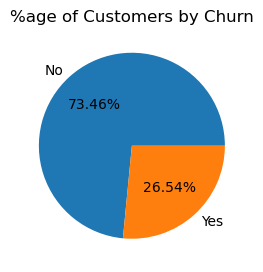

In [97]:
plt.figure(figsize = (3,4))
grp=df.groupby('Churn').agg({'Churn':'count'})
plt.pie(grp['Churn'],labels=grp.index,autopct='%1.2f%%')
plt.title('%age of Customers by Churn')
plt.show()  

In [ ]:
#based on above pie chart we can state that 26.54% of customers has churned out.

#let's try to find out the possible reasons behind this.

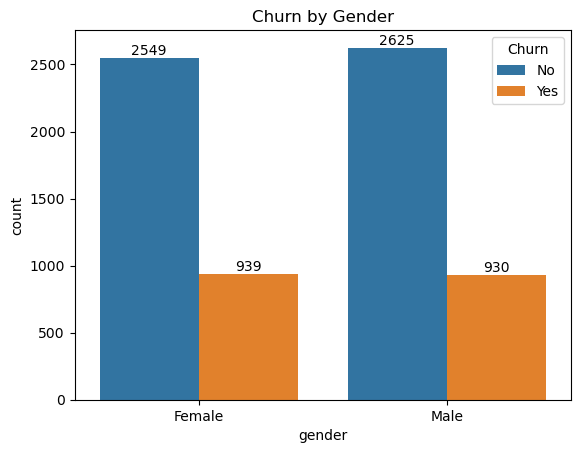

In [164]:
bx=sns.countplot(x='gender',data = df, hue='Churn')
plt.title('Churn by Gender')
bx.bar_label(bx.containers[0])
bx.bar_label(bx.containers[1])
plt.show()

In [ ]:
#Gender doesn't seems to play any role in Customer Churning out.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [186]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


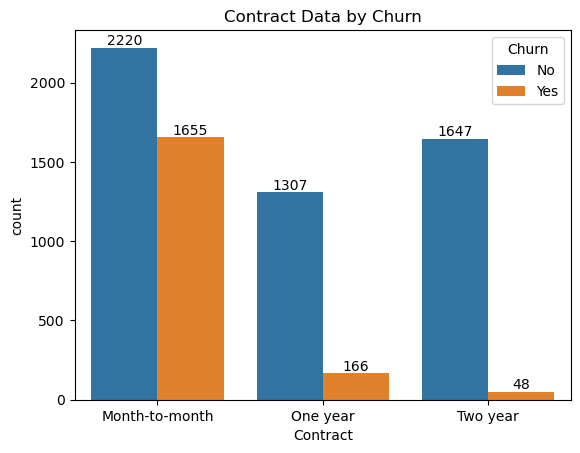

In [162]:
cx=sns.countplot(x='Contract',data = df, hue='Churn')
plt.title('Contract Data by Churn')
cx.bar_label(cx.containers[0])
cx.bar_label(cx.containers[1])
plt.show()

In [ ]:
# most of the customers opt for month-to-month service and majority of them Churn out.
# Majority of Customers with a year or greater contract tends to stay.

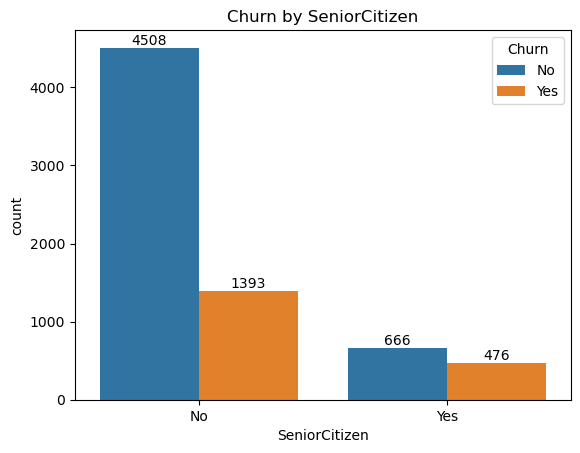

In [166]:
ex=sns.countplot(x='SeniorCitizen',data = df, hue='Churn')
plt.title('Churn by SeniorCitizen')
ex.bar_label(ex.containers[0])
ex.bar_label(ex.containers[1])
plt.show()

In [ ]:
#After looking at above graph we can say Senior Citizen are more likely to churn out.

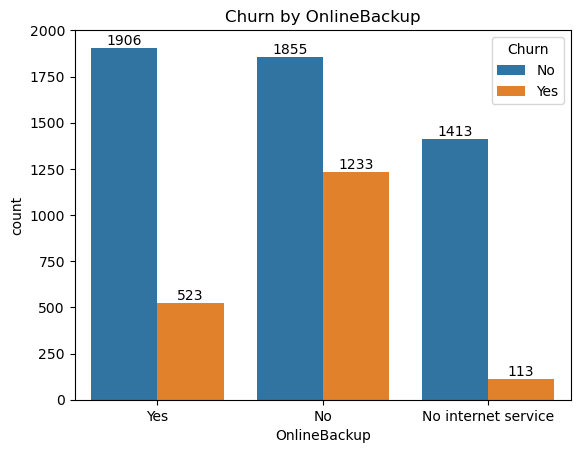

In [194]:
fx=sns.countplot(x='OnlineBackup',data = df, hue='Churn')
plt.title('Churn by OnlineBackup')
fx.bar_label(fx.containers[0])
fx.bar_label(fx.containers[1])
plt.show()

In [ ]:
#from above chart we can say that having No Online Backup contributes in Churning out of customers.

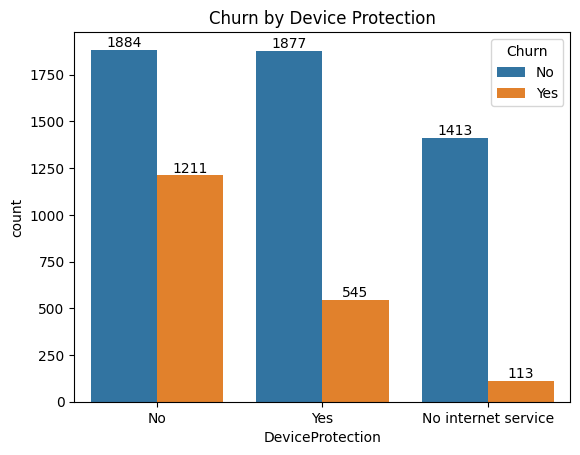

In [4]:
gx=sns.countplot(x='DeviceProtection',data = df, hue='Churn')
plt.title('Churn by Device Protection')
gx.bar_label(gx.containers[0])
gx.bar_label(gx.containers[1])
plt.show()

In [ ]:
#from above chart we can say that having No Device Protection points towards more customers Churning out.

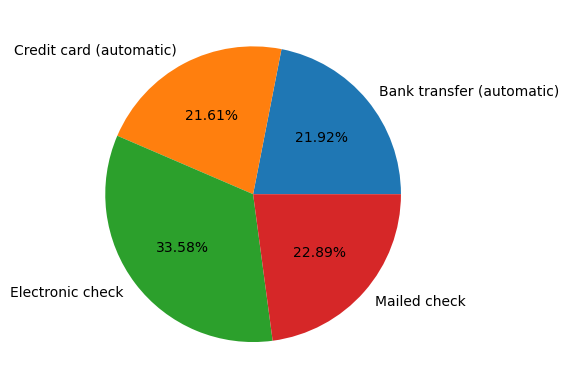

In [151]:
paygrp=df.groupby('PaymentMethod').agg({'PaymentMethod':'count'})
plt.pie(paygrp['PaymentMethod'],labels=paygrp.index,autopct='%1.2f%%')
plt.show()

In [ ]:
#payment method is well distributes among all categories, Electronic check has a slight edge among all other.

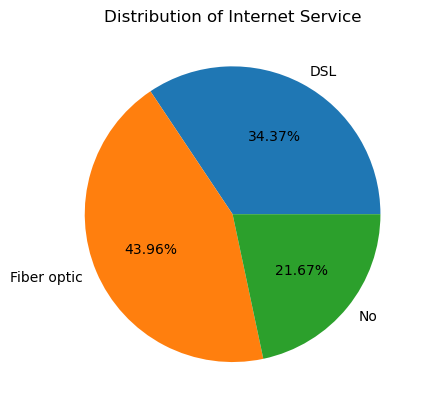

In [184]:
servgrp=df.groupby('InternetService').agg({'InternetService':'count'})
plt.pie(servgrp['InternetService'],labels=servgrp.index,autopct='%1.2f%%')
plt.title('Distribution of Internet Service')
plt.show()

In [ ]:
#Most of the users opt for Fiber optic as their internet service medium.

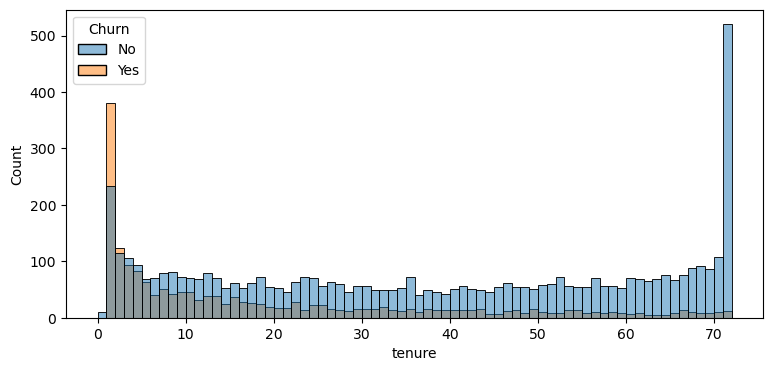

In [204]:
plt.figure(figsize=(9,4))
sns.histplot(x='tenure',data=df,hue='Churn', bins=72)
plt.show()

In [216]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

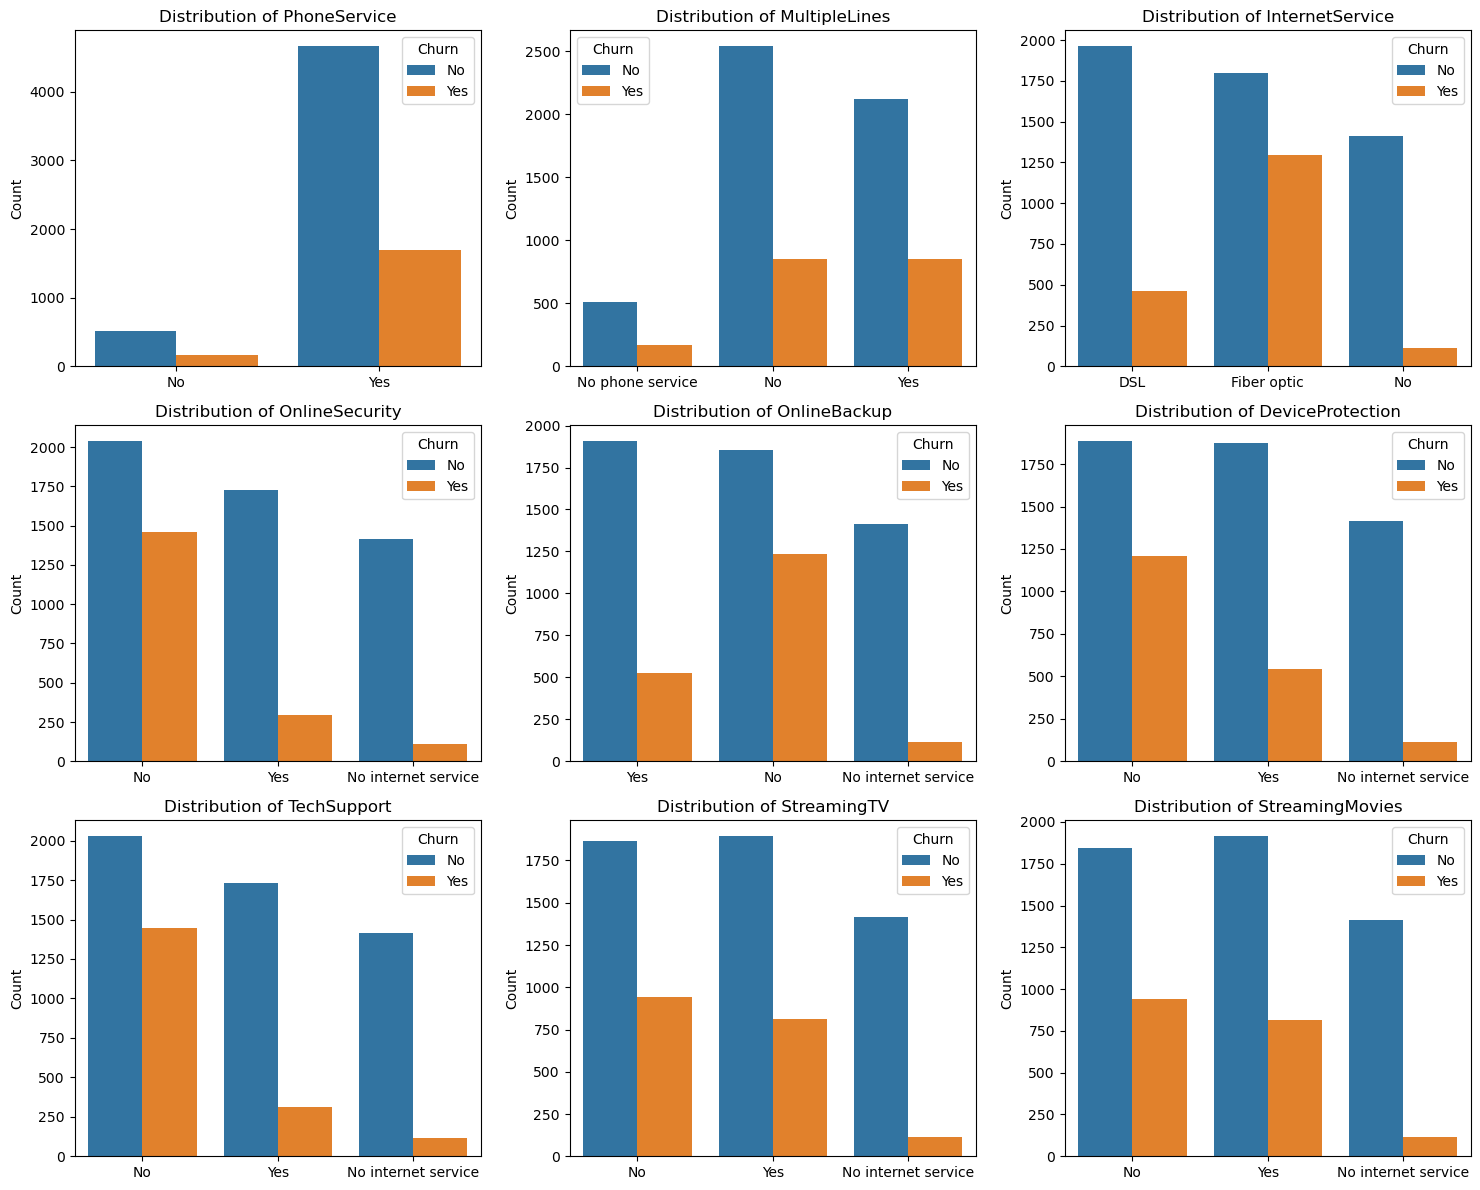

In [224]:
columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Set up the subplots (3 rows x 3 columns, for 9 total plots)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Loop through the columns and plot countplots in each subplot
for i, column in enumerate(columns):
    sns.countplot(x=column, data=df, ax=axes[i],hue=df['Churn'])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')

# Adjust layout to prevent overlapping labels
plt.tight_layout()
plt.show()

In [ ]:
# Above 9 plots shows the distribution of services factoring in the Churn value.